In [21]:
from timeit import timeit
import numpy as np
import matplotlib.pyplot as plt

### Exercise 3.1 - Part A

#### a)

In [15]:
def polynomium(a, b, c, x):
    return a*x**2 + b*x + c
    

def find_roots(a, b, c, dtype):
   
    if dtype == 16:
        a = np.float16(a)
        b = np.float16(b)
        c = np.float16(c)
        alpha = np.float16(np.sqrt(b**np.longdouble(2).astype(a) -np.longdouble(4).astype(a) * a * c))
        x_a1 = np.float16((-b+alpha)/(2*a))
        x_a2 = np.float16((-b-alpha)/(2*a))
        x_b1 = np.float16((2*c)/(-b-alpha))
        x_b2 = np.float16((2*c)/(-b+alpha))
    
    if dtype == 32:
        a = np.float32(a)
        b = np.float32(b)
        c = np.float32(c)
        alpha = np.float32(np.sqrt(b**np.longdouble(2).astype(a) -np.longdouble(4).astype(a) * a * c))
        x_a1 = np.float32((-b+alpha)/(2*a))
        x_a2 = np.float32((-b-alpha)/(2*a))
        x_b1 = np.float32((2*c)/(-b-alpha))
        x_b2 = np.float32((2*c)/(-b+alpha))
        
    if dtype == 64:
        a = np.float64(a)
        b = np.float64(b)
        c = np.float64(c)
        alpha = np.float64(np.sqrt(b**np.longdouble(2).astype(a) -np.longdouble(4).astype(a) * a * c))
        x_a1 = np.float64((-b+alpha)/(2*a))
        x_a2 = np.float64((-b-alpha)/(2*a))
        x_b1 = np.float64((2*c)/(-b-alpha))
        x_b2 = np.float64((2*c)/(-b+alpha))
    
    return x_a1, x_a2, x_b1, x_b2

In [18]:
a = 10**-5
b = 10**3
c = 10**3

bin16 = find_roots(a, b, c, 16)
bin32 = find_roots(a, b, c, 32)
bin64 = find_roots(a, b, c, 64)

print(*bin16)
print(*bin32)
print(*bin64)

inf -inf -0.0 0.0
-3.0517578 -100000000.0 -1.0 -32768000.0
-1.0000000088439265 -99999998.99999999 -1.0000000100000002 -99999999.11560737


/tmp/ipykernel_16096/2223974181.py:11: RuntimeWarning: overflow encountered in scalar power
  alpha = np.float16(np.sqrt(b**np.longdouble(2).astype(a) -np.longdouble(4).astype(a) * a * c))


It seems that the results vary greatly depending on the precision we use.

If we use 16 bit there is overflows resulting in infinites. In 32 bit we get numerical results, but they are wrong.

In 64 bit float we seem to get the right results.

#### b)

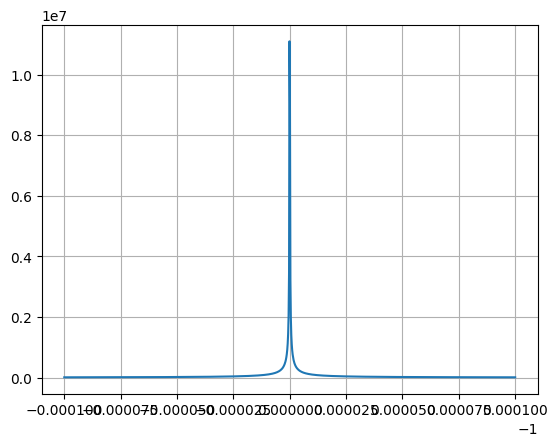

In [ ]:


def conditional_number(a, b, c, x_0, x_delta):
    return (np.abs(polynomium(a, b, c, (x_0 + x_delta)) - polynomium(a, b, c, x_0)))/np.abs(polynomium(a, b, c, x_0)) * np.abs(x_0)/np.abs(x_delta)

a = 10**-5
b = 10**3
c = 10**3
x_delta = 10e-5
d_0 = [10**1, 10**0, 10**-1, 10**-2, 10**-3, 10**-4]
x_0_hat = -1
x_axis = [np.linspace((x_0_hat - i), (x_0_hat + i), 1000) for i in d_0]


plt.Figure()

plt.plot(x_axis[5], conditional_number(a, b, c, x_axis[5], x_delta=x_delta))
plt.grid()